In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from Utils import PatchMatchTracking, make_gif, mask_on_image

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
root = 'sequences-train/'
name = 'swan' # name of the sequence : bag, bear, book, camel, rhino, swan
im_begin, im_end = 1, 26 # reference image (1) and last image (varies depending on the sequence)

In [3]:
imgs = []
masks = []
for k in range(1, 10):
    imgs.append(io.imread(root + name + '-%0*d.bmp'%(3,k)))
    masks.append(io.imread(root + name + '-%0*d.png'%(3,k)))

In [4]:
tracker = PatchMatchTracking(n_iter=10, threshold=8, monte_carlo=True)
esti_mask = tracker.track(imgs, masks[0])

  0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
i = 4

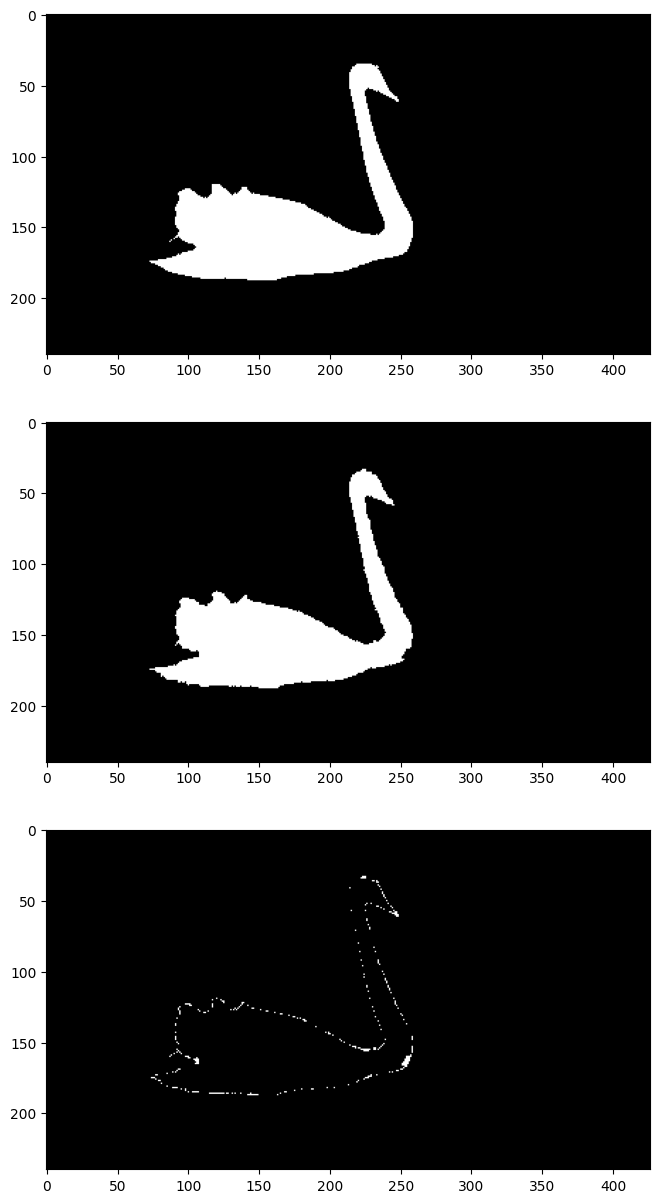

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(20, 15))

axs[0].imshow(masks[i], cmap="gray")
axs[1].imshow(esti_mask[i], cmap="gray")
axs[2].imshow(np.abs(masks[i]-esti_mask[i]), cmap="gray")
plt.show()

In [7]:
t1, t2 = mask_on_image(imgs[i], esti_mask[i])
t3, t4 = mask_on_image(imgs[i], masks[i])

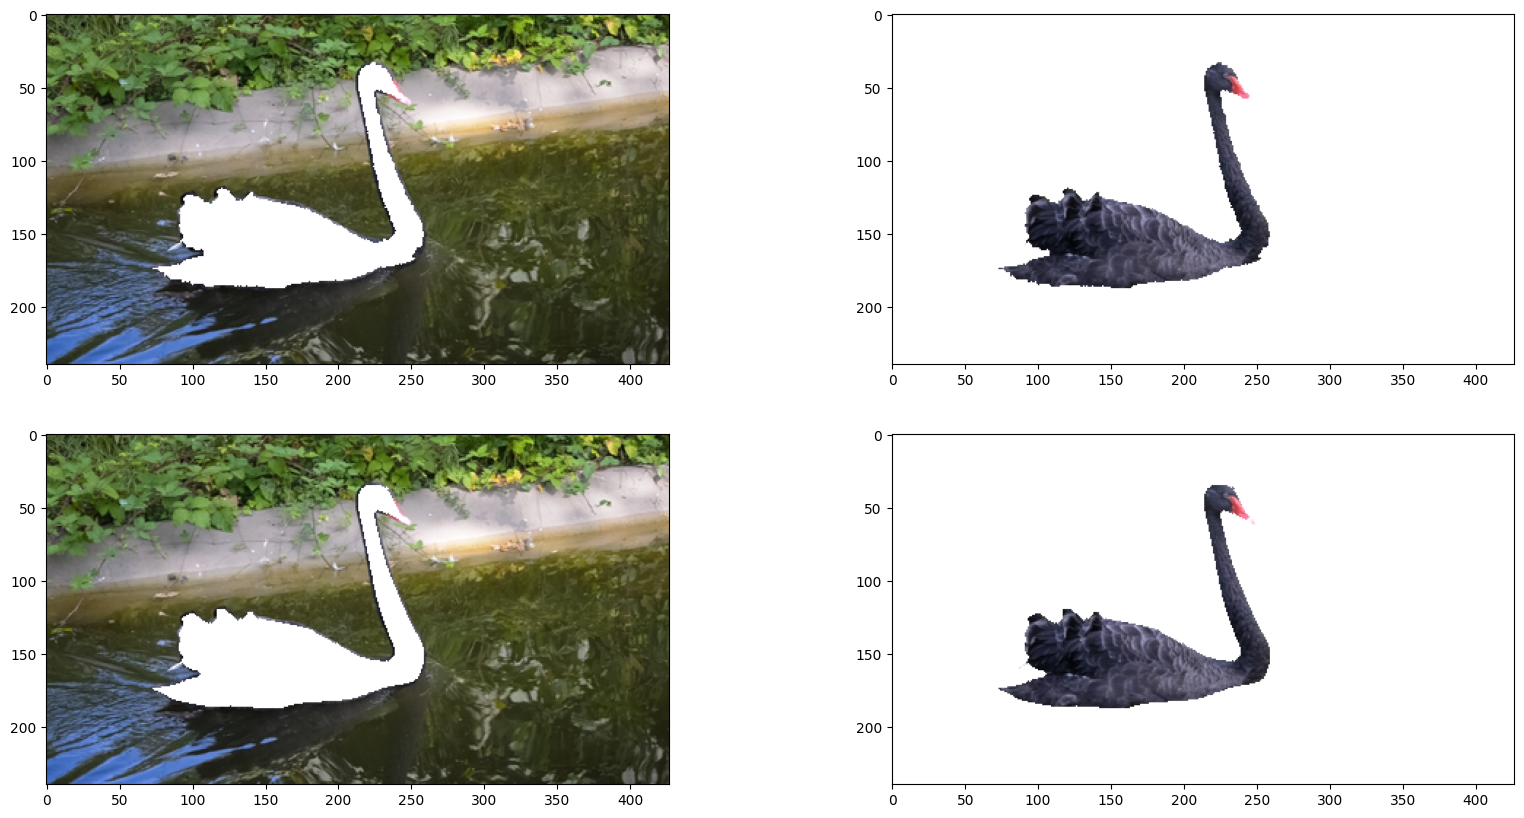

In [8]:
fig, axs = plt.subplots(2, 2,  figsize=(20,10))
axs[0, 0].imshow(t1)
axs[0, 1].imshow(t2)
axs[1, 0].imshow(t3)
axs[1, 1].imshow(t4)
plt.show()


In [9]:
make_gif(masks, "swan_masks")
make_gif(esti_mask, "esti_swan_masks")
make_gif([m - e_m for m, e_m in zip(masks, esti_mask)], "diff")

In [10]:
make_gif(imgs, "swan")